In [1]:
# import all the required packages

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# to ignore warnining messeges
import warnings
warnings.filterwarnings('ignore')

## Load Dataset & Data Cleaning

In [3]:
#load the dataset
bp=pd.read_excel('bankruptcy-prevention.xlsx',sheet_name=0, header=None)

In [4]:
# Raw data
bp

,0
0,industrial_risk; management_risk; financial_fl...
1,0.5;1;0;0;0;0.5;bankruptcy
2,0;1;0;0;0;1;bankruptcy
3,1;0;0;0;0;1;bankruptcy
4,0.5;0;0;0.5;0;1;bankruptcy
...,...
246,0;1;1;1;1;1;non-bankruptcy
247,1;1;0.5;1;1;0;non-bankruptcy
248,0;1;1;0.5;0.5;0;non-bankruptcy
249,1;0;0.5;1;0.5;0;non-bankruptcy


#### The entire dataset was stored in one column (bp[0]), with values separated by semicolons (;). so we need to split the data and store them in different columns

In [5]:
bp=bp[0].str.split(';',expand=True)  # split the data and store them in seperate columns
bp.columns=bp.iloc[0]                # extract the first row and assign them as column headers
bp=bp[1:]                            # remove first row from the data as its being used as column head

bp.reset_index(drop=True, inplace=True) # reset the index values

# remove un-necessary spaces from column names
bp.columns = bp.columns.str.strip().str.lower()  ## Convert to lowercase for consistency
print(bp.columns) 

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object', name=0)


In [6]:
# Convert target variable to numerical format
bp['class'] = bp['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

In [7]:
# display the dataset
bp

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,1
1,0,1,0,0,0,1,1
2,1,0,0,0,0,1,1
3,0.5,0,0,0.5,0,1,1
4,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,0
246,1,1,0.5,1,1,0,0
247,0,1,1,0.5,0.5,0,0
248,1,0,0.5,1,0.5,0,0


## Exploratory Data Analysis (EDA)

In [8]:
bp.info()    # Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 13.8+ KB


In [9]:
bp.describe()   # Summary and Statistics

,class
count,250.000000
mean,0.428000
std,0.495781
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
bp.size   # size of the dataset

1750

In [11]:
bp.shape # shape of dataset

(250, 7)

In [12]:
# check for null values
bp.isnull().sum()

0
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [13]:
bp.duplicated().sum() # check for duplicates 

np.int64(147)

In [14]:
corr = bp.drop(columns=["class"]).corr() # correlation values
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,,,,,,
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


## Visualizations

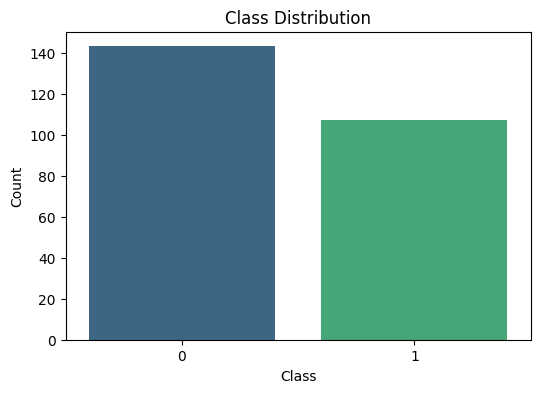

In [15]:
#Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=bp["class"], palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

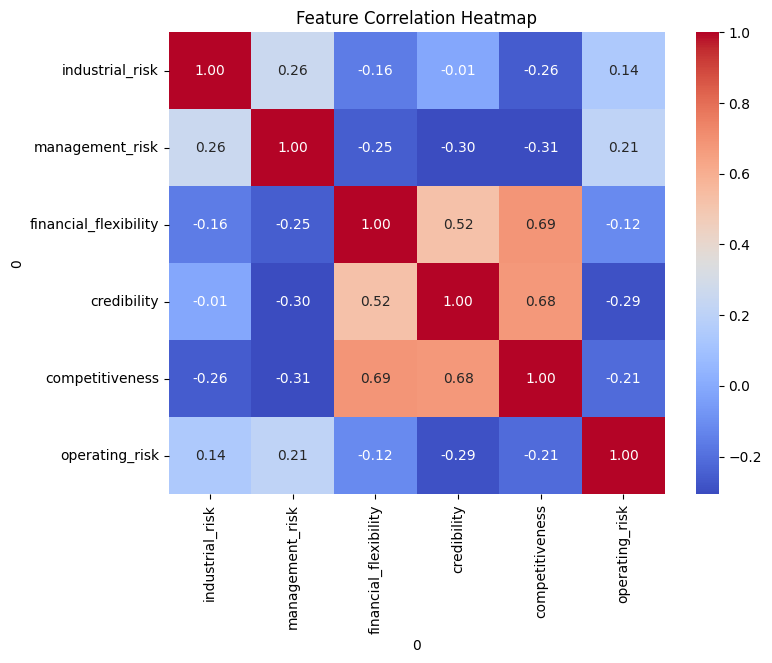

In [16]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

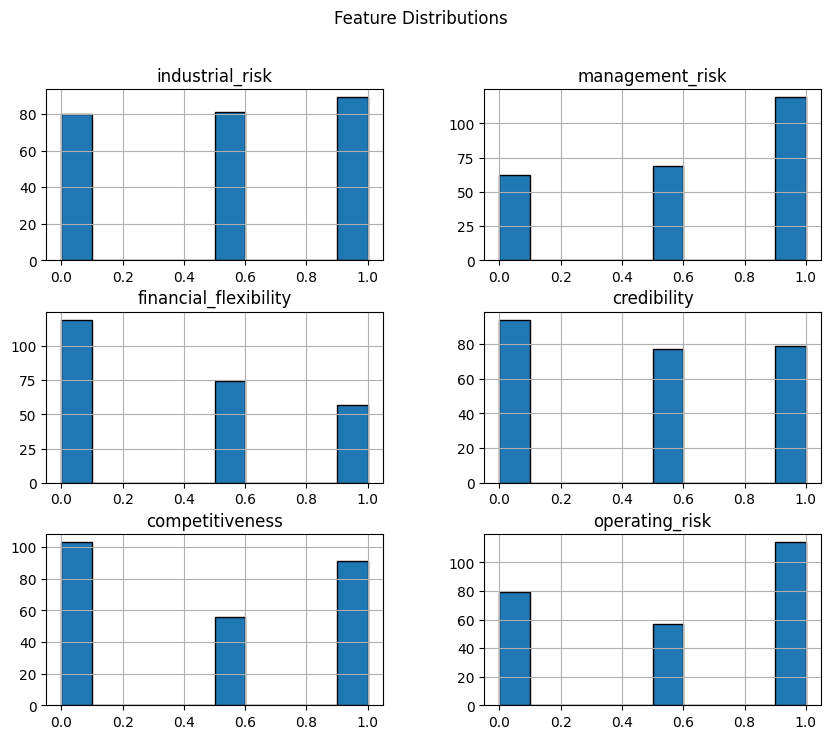

In [17]:
# Convert numerical columns to float
numeric_columns = bp.columns[:-1]  # Excluding 'class'
bp[numeric_columns] = bp[numeric_columns].astype(float)

# plot histograms
bp[numeric_columns].hist(figsize=(10, 8), bins=10, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

## Pre-Processing

In [18]:
# divide the data as feature and Target
features = bp.drop(columns=['class'])
target = bp['class']

In [19]:
print('Features')
print(features)

print('Target')
print(target)

Features
0    industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
..               ...              ...                    ...          ...   
245              0.0              1.0                    1.0          1.0   
246              1.0              1.0                    0.5          1.0   
247              0.0              1.0                    1.0          0.5   
248              1.0              0.0                    0.5          1.0   
249              1.0              0.0                    0.5          0.5   

0    competitiveness  operating_risk  
0                0.0       

In [20]:
# Split dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test=train_test_split(features,target, train_size=0.8, random_state=42)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 6)
(50, 6)
(200,)
(50,)


## Model Training and Evaluation

In [22]:
# Define machine learning models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# List to store model performance results
results = []

# Train each model and compute evaluation metrics using for loop
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test) # Predict on test data
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
     # Store results with two decimal precision
    results.append([name, f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"])

# Convert results into a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
results_df.set_index("Model", inplace=True)

# Print the performance metrics
print("\nModel Performance Metrics:")
print(results_df)


Model Performance Metrics:
                    Accuracy Precision Recall F1 Score
Model                                                 
Logistic Regression     1.00      1.00   1.00     1.00
Decision Tree           0.98      0.95   1.00     0.98
Random Forest           1.00      1.00   1.00     1.00
XGBoost                 0.98      0.95   1.00     0.98
SVM                     1.00      1.00   1.00     1.00
KNN                     1.00      1.00   1.00     1.00


## Deployment

In [23]:
# To deploy we are considering Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
# Save the model using pickle
import pickle

file = 'Bankruptcy_Prevention.pkl'    # Define a file name
pickle.dump(log_reg, open(file, 'wb'))  # Save the trained model to a pickle file
print("Model saved as Bankruptcy_Prevention.pkl")

Model saved as Bankruptcy_Prevention.pkl
